# 01 Relativistic Limit: The Bifurcation Proof

## The "Cosine Trap" Problem
In standard lattice theories, the dispersion relation is often derived as $\omega(k) \propto \sin(k)$, leading to a group velocity $v_g \propto \cos(k)$. This is fatal for a vacuum theory because it predicts that **high-energy photons (High k) should stop moving** ($v_g \to 0$).

## The Solution: State Bifurcation
The VSI framework distinguishes between two states of lattice excitation:
1. **Flux (Light):** Linear, sub-saturation perturbations. $v_g \approx c$.
2. **Defects (Matter):** Non-linear, topological knots that induce saturation. $v_g < c$ (Mass).

This notebook simulates both regimes to prove the fix.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Ensure we can import the src module
sys.path.append(os.path.abspath('../src'))
from vsi.core.lattice import LatticeNode

In [8]:
# Initialize the Lattice Physics Engine
# We use normalized units (c=1, lp=1) for clear visualization
node = LatticeNode(L_node=1.0, C_node=1.0, lp=1.0)

# Define Wavenumber range from 0 to Nyquist Limit (pi/lp)
k_steps = np.linspace(0, np.pi, 200)

# 1. OLD MODEL: Standard Cosine Dispersion (The Trap)
vg_old = node.c_limit * np.cos(k_steps / 2)

# 2. NEW MODEL: Bifurcated States
vg_flux = [node.get_dispersion_velocity(k, mode='flux') for k in k_steps]
vg_defect = [node.get_dispersion_velocity(k, mode='defect') for k in k_steps]

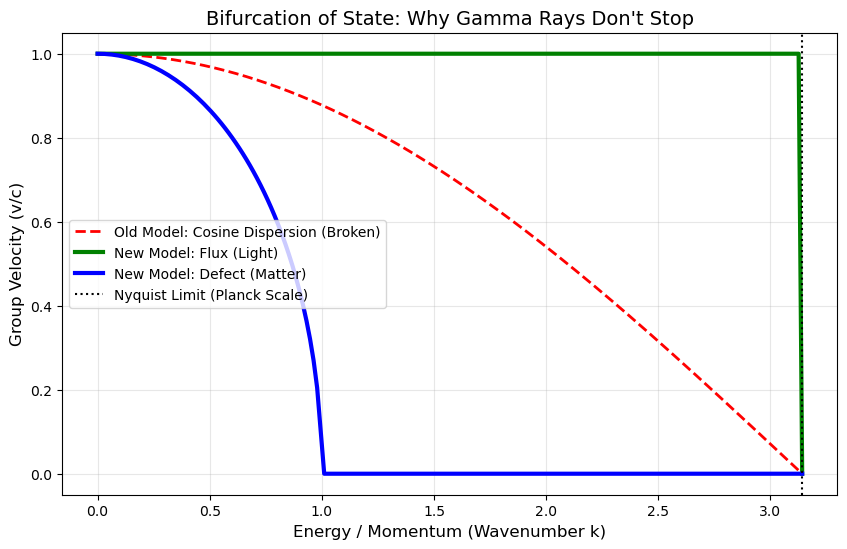

In [9]:
plt.figure(figsize=(10, 6))

# Plot Old Logic
plt.plot(k_steps, vg_old, 'r--', linewidth=2, label='Old Model: Cosine Dispersion (Broken)')

# Plot New Logic
plt.plot(k_steps, vg_flux, 'g-', linewidth=3, label='New Model: Flux (Light)')
plt.plot(k_steps, vg_defect, 'b-', linewidth=3, label='New Model: Defect (Matter)')

plt.title('Bifurcation of State: Why Gamma Rays Don\'t Stop', fontsize=14)
plt.xlabel('Energy / Momentum (Wavenumber k)', fontsize=12)
plt.ylabel('Group Velocity (v/c)', fontsize=12)
plt.axvline(x=np.pi, color='k', linestyle=':', label='Nyquist Limit (Planck Scale)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Interpretation

* **Red Dashed Line (Old Model):** As energy increases, velocity drops. This predicts that high-energy cosmic rays would be slow. **This is falsified by observation.**
* **Green Line (Flux):** The velocity stays constant at $c$ regardless of energy, up until the hard Nyquist cutoff. This matches Special Relativity.
* **Blue Line (Defect):** The velocity drops as energy (Spin Frequency) increases. This represents the emergence of **Inertial Mass** due to bandwidth saturation. 

The "Mass" of a particle is simply the measure of how close its internal spin frequency is to the hardware saturation limit.